In [19]:
from astropy.table import Table
from common import m13_info
from astropy.coordinates import SkyCoord
import astropy.units as u

previous_filename = "m13_01.hdf5"
stars = Table.read(previous_filename, path="gaia")


center_coords = SkyCoord(ra=m13_info()['ra'], dec=m13_info()['dec'], frame='icrs')
search_radius = 0.14* u.deg

table_coords = SkyCoord(ra=stars['ra'], dec=stars['dec'], frame='icrs')
separations = center_coords.separation(table_coords)
central_stars = stars[separations <= search_radius]



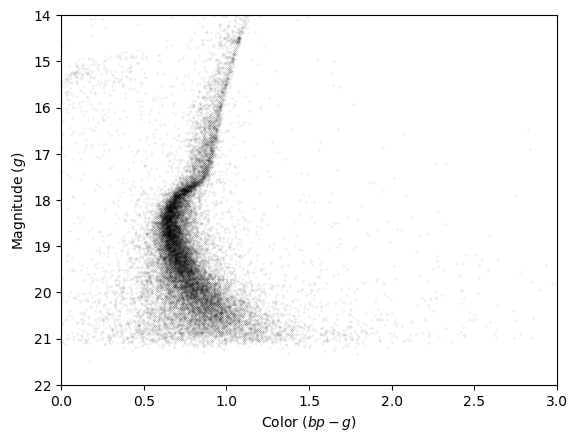

In [28]:
import matplotlib.pyplot as plt

def plot_bcmd(mag, color):

    plt.plot(color, mag,'ko', markersize=.1, alpha=.5)
    
    plt.xlim(0,3)
    plt.ylim(14,22)
    plt.gca().invert_yaxis()
    
    plt.ylabel('Magnitude $(g)$')
    plt.xlabel('Color $(bp-g)$')

gaia_rp = central_stars['phot_rp_mean_mag']
gaia_g = central_stars['phot_g_mean_mag']
gaia_bp = central_stars['phot_bp_mean_mag']
plot_bcmd(gaia_g, gaia_bp-gaia_rp)


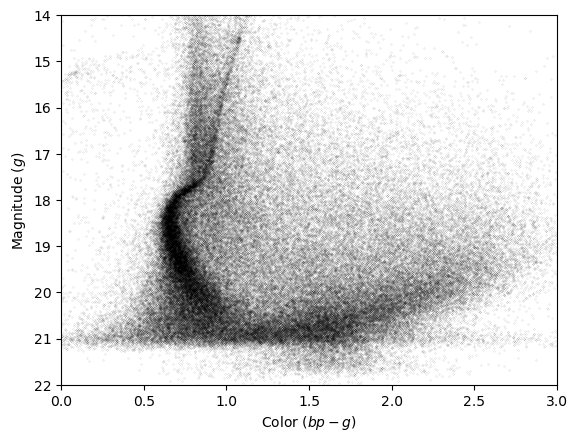

In [11]:
plot_bcmd(stars, stars['phot_g_mean_mag'], stars['phot_bp_mean_mag'] - stars['phot_rp_mean_mag'])
